## Pré-processamento de dados  - Breast Cancer dataset

* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('breast_cancer_missing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                569 non-null    int64  
 1   mean_radius              527 non-null    float64
 2   mean_texture             521 non-null    float64
 3   mean_perimeter           508 non-null    float64
 4   mean_area                502 non-null    float64
 5   mean_smoothness          523 non-null    float64
 6   mean_compactness         510 non-null    float64
 7   mean_concavity           502 non-null    float64
 8   mean_concave_points      514 non-null    float64
 9   mean_symmetry            519 non-null    float64
 10  mean_fractal_dimension   513 non-null    float64
 11  radius_error             511 non-null    float64
 12  texture_error            513 non-null    float64
 13  perimeter_error          505 non-null    float64
 14  area_error               5

## Limpeza dos Dados

### Dados Faltantes

In [ ]:
df.isnull().sum()

sample_id                   0
mean_radius                42
mean_texture               48
mean_perimeter             61
mean_area                  67
mean_smoothness            46
mean_compactness           59
mean_concavity             67
mean_concave_points        55
mean_symmetry              50
mean_fractal_dimension     56
radius_error               58
texture_error              56
perimeter_error            64
area_error                 60
smoothness_error           54
compactness_error          60
concavity_error            59
concave_points_error       45
symmetry_error             58
fractal_dimension_error    52
worst_radius               47
worst_texture              58
worst_perimeter            66
worst_area                 60
worst_smoothness           63
worst_compactness          53
worst_concavity            50
worst_concave_points       52
worst_symmetry             59
worst_fractal_dimension    75
diagnosis                  64
dtype: int64

In [ ]:
df['diagnosis'].isnull().sum()

64

In [ ]:
#Remove os dados faltantes em diagnosis
df.dropna(subset=['diagnosis'],inplace=True)

In [ ]:
df['diagnosis'].isnull().sum()

0

In [ ]:
# Obtem o nome das colunas com NaN
# Deixa no formato list
nan_columns = df.columns[df.isna().any()].tolist()

In [ ]:
# Percorre cada coluna calculando a média
# Substitui todos os NaN pela média
for col in nan_columns:
  media = df[col].mean()
  print(media)
  df[col].fillna(media, inplace=True)

14.199702355460387
19.27627155172414
92.82754966887418
655.7441964285715
0.09656095032397409
0.10429558758314857
0.09061060135135138
0.05012960352422907
0.18145119305856833
0.06304136563876651
0.4074896929824561
1.205546799116998
2.9253336283185836
40.40882926829268
0.007074840611353712
0.026135179600886918
0.032873957743362825
0.012027144708423324
0.020362975770925107
0.003854444857768052
16.408450216450216
25.57175824175824
107.61477876106196
880.6248337028826
0.13211443458980043
0.25396089324618737
0.2738400715835141
0.11536521710526315
0.2903896247240618
0.08413929061784897


In [ ]:
df.isnull().sum()

sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [ ]:
# Forma otimizada
df[nan_columns] = df[nan_columns].fillna('mean')
# df.fillna(df[nan_columns].mean(), inplace=True)

In [ ]:
df.isnull().sum()

sample_id                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [ ]:
# Remove sample_id
df.drop(['sample_id'], axis=1, inplace=True)

## Normalização de atributos numéricos

In [ ]:
scaler_cols = df.columns[1:30]
print(scaler_cols)

Index(['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
       'mean_compactness', 'mean_concavity', 'mean_concave_points',
       'mean_symmetry', 'mean_fractal_dimension', 'radius_error',
       'texture_error', 'perimeter_error', 'area_error', 'smoothness_error',
       'compactness_error', 'concavity_error', 'concave_points_error',
       'symmetry_error', 'fractal_dimension_error', 'worst_radius',
       'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')


In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,655.744196,0.1184,0.277600,0.300100,0.14710,0.181451,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.27384,0.2654,0.46010,0.11890,malignant
2,19.69,21.25,130.00,1203.000000,0.1096,0.104296,0.090611,0.12790,0.206900,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.2430,0.29039,0.08758,malignant
3,11.42,20.38,77.58,386.100000,0.1425,0.283900,0.090611,0.10520,0.259700,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.2575,0.66380,0.17300,malignant
4,20.29,14.34,135.10,1297.000000,0.1003,0.132800,0.090611,0.10430,0.180900,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.1625,0.23640,0.07678,malignant
5,12.45,15.70,82.57,477.100000,0.1278,0.170000,0.157800,0.08089,0.208700,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.1741,0.39850,0.12440,malignant


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,-2.172329,1.283164,3.421260e-16,1.622464,3.508049e+00,2.736543e+00,2.562904,1.054117e-15,2.394362,...,-1.484189,2.356961,2.106997,1.462564,2.759463,0.000000,2.375010,2.859841,2.124614,malignant
2,19.69,0.481953,1.591406,1.646896e+00,0.968696,2.809158e-16,3.625689e-16,2.055453,9.665091e-01,-0.466287,...,-0.007520,1.374195,1.533224,0.597244,1.143226,0.886155,2.020424,0.000000,0.210300,malignant
3,11.42,0.269513,-0.652770,-8.114597e-01,3.412898,3.635574e+00,3.625689e-16,1.455497,2.971777e+00,5.256539,...,0.167159,-0.267728,-0.579187,3.776567,4.104876,2.073151,2.249955,6.292452,5.431268,malignant
4,20.29,-1.205359,1.809745,1.929777e+00,0.277781,5.769897e-01,3.625689e-16,1.431710,-2.093352e-02,-0.643549,...,-1.603042,1.365011,1.285206,0.256950,-0.328214,0.633198,0.746131,-0.909796,-0.449808,malignant
5,12.45,-0.873269,-0.439141,-5.376068e-01,2.320808,1.329997e+00,8.776898e-01,0.812990,1.034871e+00,2.000106,...,-0.328065,-0.129039,-0.257318,2.284133,1.816267,1.313273,0.929756,1.821801,2.460780,malignant


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              505 non-null    float64
 1   mean_texture             505 non-null    float64
 2   mean_perimeter           505 non-null    float64
 3   mean_area                505 non-null    float64
 4   mean_smoothness          505 non-null    float64
 5   mean_compactness         505 non-null    float64
 6   mean_concavity           505 non-null    float64
 7   mean_concave_points      505 non-null    float64
 8   mean_symmetry            505 non-null    float64
 9   mean_fractal_dimension   505 non-null    float64
 10  radius_error             505 non-null    float64
 11  texture_error            505 non-null    float64
 12  perimeter_error          505 non-null    float64
 13  area_error               505 non-null    float64
 14  smoothness_error         5

## Modelos de Machine Learning

### Separação entre treino e teste

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Transforma os dados categóricos de diagnosis
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [ ]:
df['diagnosis'].value_counts()

0    316
1    189
Name: diagnosis, dtype: int64

In [ ]:
# Formato dataframe e series
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Randon Forest

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)

y_pred = forest.predict(X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9342105263157895


### Métricas de avaliação

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

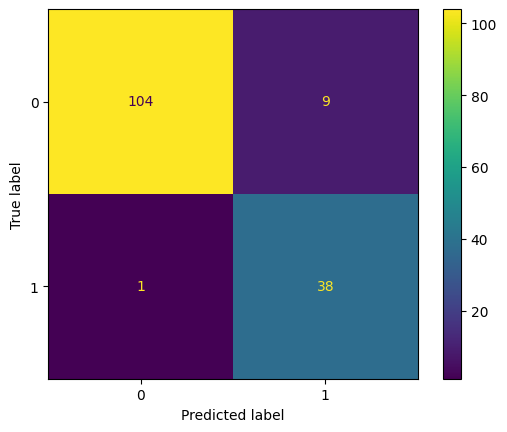

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.934
Recall :0.97
Precision :0.81
F1-score :0.88


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       113
           1       0.81      0.97      0.88        39

    accuracy                           0.93       152
   macro avg       0.90      0.95      0.92       152
weighted avg       0.94      0.93      0.94       152



## Seleção de Características

In [ ]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif

# to select the features
from sklearn.feature_selection import SelectKBest

#### Heatmap com as correlações entre os atributos

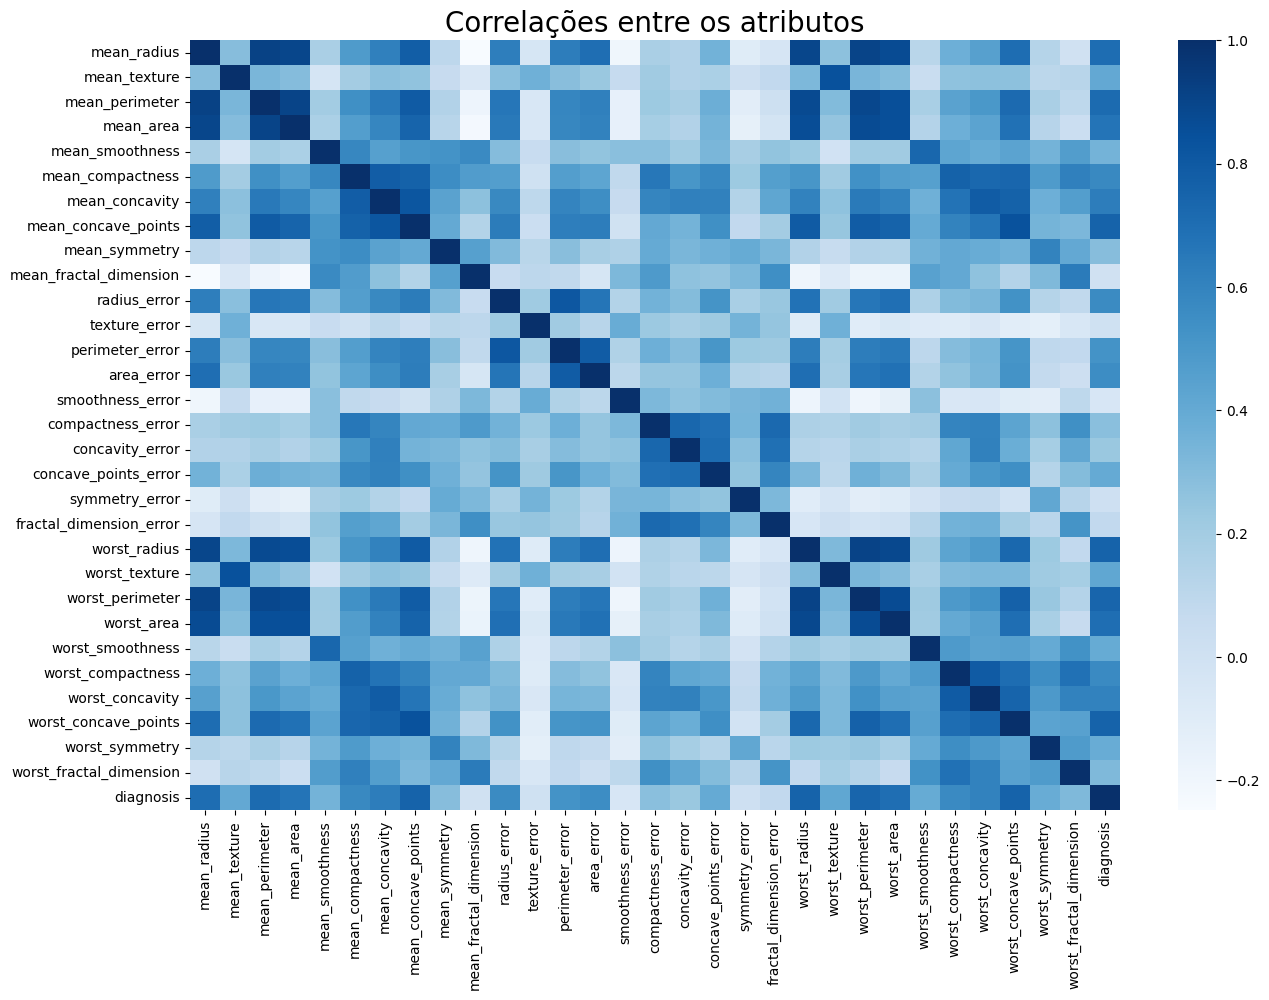

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.title("Correlações entre os atributos", size = 20)
plt.show()

In [ ]:
#  O método considera que, além de alta correlação com os rótulos (classe)
#  é necessário que os atributos possuam baixa correlação entre si.

mi = mutual_info_classif(X_train, y_train)
mi

array([0.3452248 , 0.09765448, 0.37847131, 0.36196089, 0.1060829 ,
       0.18494988, 0.32982135, 0.42825613, 0.04521435, 0.        ,
       0.24607349, 0.00599749, 0.2624742 , 0.31654384, 0.04833958,
       0.02527456, 0.12591871, 0.17385121, 0.029523  , 0.03084437,
       0.44155808, 0.09713262, 0.43421952, 0.40196691, 0.09515747,
       0.22306496, 0.26169177, 0.39177566, 0.09994428, 0.04421411])

Text(0, 0.5, 'Mutual Information')

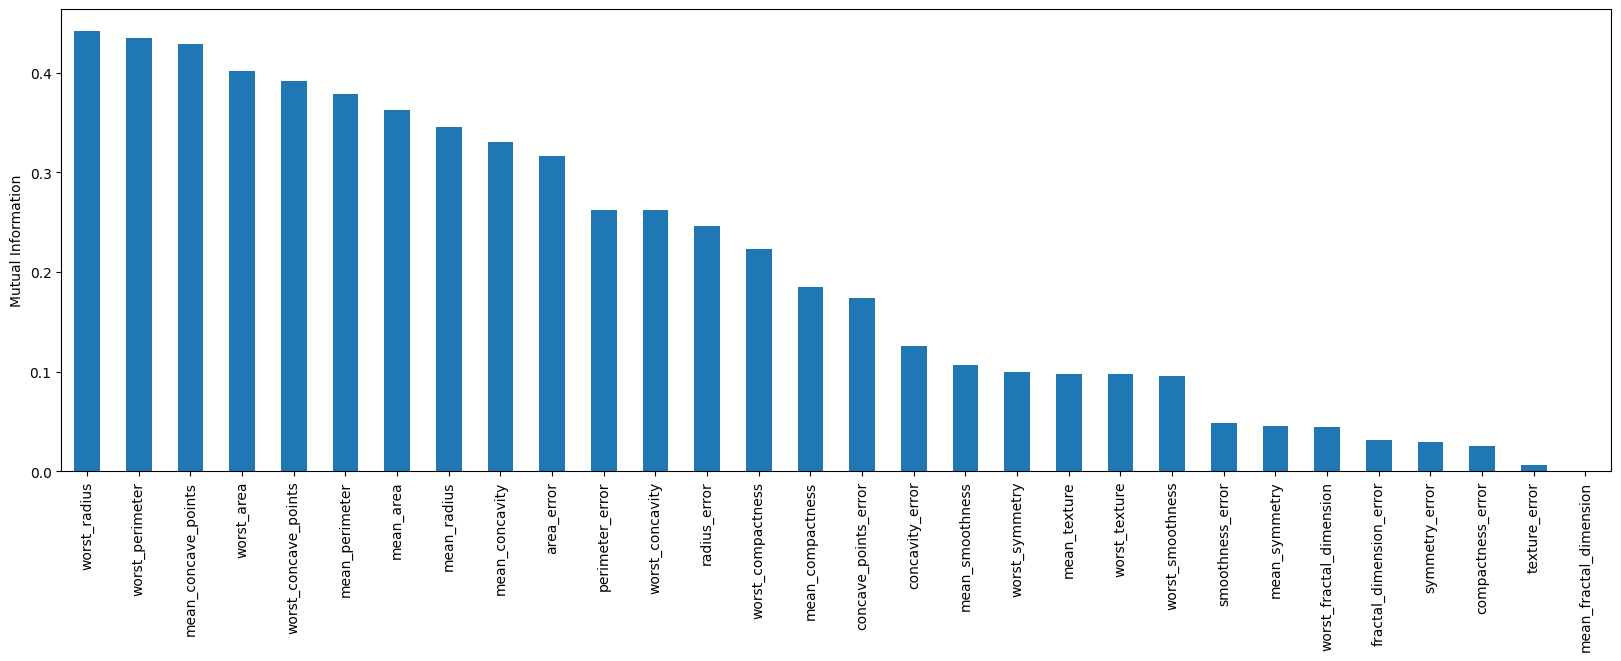

In [ ]:
# Apresenta os valores de MI ordenados
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [ ]:
print(np.sort(forest.feature_importances_))

[0.00327786 0.00352751 0.00381018 0.0048079  0.00518952 0.00527142
 0.00543373 0.00603177 0.00809658 0.0084662  0.01019628 0.01203922
 0.01307559 0.01351564 0.0148924  0.01520991 0.01694129 0.01696399
 0.0198183  0.02693111 0.027568   0.04333585 0.04607091 0.06885895
 0.06990349 0.08858199 0.09818415 0.10653705 0.11117056 0.12629264]


In [ ]:
# Seleciona as 'k' melhores features baseado na MI
sel_ = SelectKBest(mutual_info_classif, k=15).fit(X_train, y_train)

# Método get_support() apresenta as features selecionadas
X_train.columns[sel_.get_support()]

Index(['mean_radius', 'mean_perimeter', 'mean_area', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'radius_error',
       'perimeter_error', 'area_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity',
       'worst_concave_points'],
      dtype='object')

In [ ]:
sel_.get_support()

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False, False])

In [ ]:
featuresMutualInfromation = X_train.columns[sel_.get_support()]

In [ ]:
# Remove as características menos relevantes:
New_X_train = sel_.transform(X_train)
New_X_test = sel_.transform(X_test)

In [ ]:
# Cria o modelo RandonForest
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(New_X_train, y_train)
forest_score = forest.score(New_X_train, y_train)
forest_test = forest.score(New_X_test, y_test)

y_pred = forest.predict(New_X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9407894736842105


In [ ]:
accuracy_score(y_test,y_pred)

0.9407894736842105

In [ ]:
print(np.sort(forest.feature_importances_))

[0.01224354 0.01627967 0.01722108 0.02205688 0.02332613 0.03786319
 0.03788307 0.03810239 0.04029305 0.05491319 0.08691004 0.11685046
 0.13690317 0.171907   0.18724713]


## Framework Feature-Engine
* https://feature-engine.trainindata.com/en/latest/

In [ ]:
 !pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

#### Método força bruta (DropCorrelatedFeatures)
* Avalia par-a-par as características utilizando método de correlação

In [ ]:
# Seleção por força bruta
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson'
)

# find correlated features
sel.fit(X_train)

DropCorrelatedFeatures()

In [ ]:
# Grupos de features com alta correlação
sel.correlated_feature_sets_

[{'mean_area',
  'mean_perimeter',
  'mean_radius',
  'worst_area',
  'worst_perimeter',
  'worst_radius'},
 {'mean_texture', 'worst_texture'},
 {'mean_compactness', 'mean_concavity'},
 {'mean_concave_points', 'worst_concave_points'},
 {'worst_compactness', 'worst_concavity'}]

In [ ]:
# Features que foram removidas
len(sel.features_to_drop_)

9

In [ ]:
featuresBruteForce = X_train.columns[sel.get_support()]

In [ ]:
# drop correlated features
New_X_train = sel.transform(X_train)
New_X_test = sel.transform(X_test)

New_X_train.shape, New_X_test.shape

((353, 21), (152, 21))

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(New_X_train, y_train)
forest_score = forest.score(New_X_train, y_train)
forest_test = forest.score(New_X_test, y_test)

y_pred = forest.predict(New_X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9473684210526315


####SmartCorrelationSelection
* Gera grupo de features com alta correlaçãoModel Performance
* Escolhe as melhores features de cada grupo baseado no desempenho de um classificador
* Pode ser classficado como modelo híbrido (Filter + Wrapper)

In [ ]:
# random forest
rf = RandomForestClassifier(
    n_estimators=20,
    random_state=20
)

# correlation selector
sel = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.8,
    selection_method="model_performance",
    estimator=rf
)

# Treina o modelo RF para cada grupo gerado
sel.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=20,
                                                          random_state=20),
                         selection_method='model_performance')

In [ ]:
# Grupo de features com alata correlação
sel.correlated_feature_sets_

[{'mean_area',
  'mean_perimeter',
  'mean_radius',
  'worst_area',
  'worst_perimeter',
  'worst_radius'},
 {'mean_texture', 'worst_texture'},
 {'mean_compactness', 'mean_concavity'},
 {'mean_concave_points', 'worst_concave_points'},
 {'worst_compactness', 'worst_concavity'}]

In [ ]:
# Features que foram removidas
sel.features_to_drop_

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_compactness',
 'worst_radius',
 'worst_perimeter',
 'worst_compactness',
 'worst_concave_points']

In [ ]:
featuresSmartCorr = X_train.columns[sel.get_support()]

In [ ]:
# drop correlated features
New_X_train = sel.transform(X_train)
New_X_test = sel.transform(X_test)

New_X_train.shape, New_X_test.shape

((353, 21), (152, 21))

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(New_X_train, y_train)
forest_score = forest.score(New_X_train, y_train)
forest_test = forest.score(New_X_test, y_test)

y_pred = forest.predict(New_X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9342105263157895


#### Similaridade das Features

In [ ]:
# Mutual Information
print(featuresMutualInfromation)
# Brute Force
print(featuresBruteForce)
# Smart Correlation
print(featuresSmartCorr)

Index(['mean_radius', 'mean_perimeter', 'mean_area', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'radius_error',
       'perimeter_error', 'area_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity',
       'worst_concave_points'],
      dtype='object')
Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_smoothness', 'worst_compactness', 'worst_symmetry',
       'worst_fractal_dimension'],
      dtype='object')
Index(['mean_smoothness', 'mean_concavity', 'mean_concave_points',
       'mean_symmetry', 'mean_fractal_dimension', 'radius_error',
       'texture_error', 'perimeter_error', 'area_er

#### Diagrama de Venn
* Biblioteca milkviz
* https://milkviz.readthedocs.io/en/latest/

In [ ]:
!pip install milkviz

In [ ]:
# import matplotlib_venn as venn
import milkviz as mv

In [ ]:
features=[featuresMutualInfromation, featuresBruteForce, featuresSmartCorr]

<Axes: >

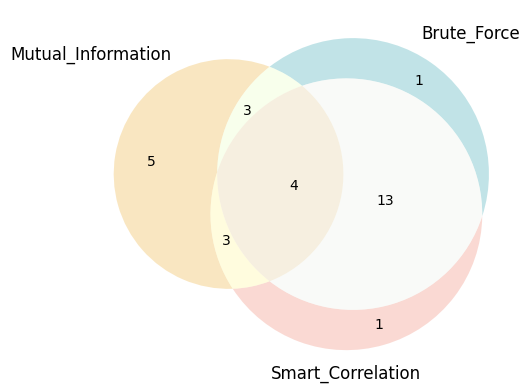

In [ ]:
mv.venn(features, names=['Mutual_Information', 'Brute_Force', 'Smart_Correlation'])

##### Features similares entre as 3 abordagens

In [ ]:
set(featuresMutualInfromation).intersection(featuresBruteForce,featuresSmartCorr)

{'area_error', 'mean_concave_points', 'perimeter_error', 'radius_error'}